## Import Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=columns)

In [36]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Now let's get the movie titles:

In [37]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [38]:
# Merge 2 dataet together
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA

In [39]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [40]:
df.groupby('title')['rating'].mean().head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

In [41]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [42]:
# Find the movies with the highest number of ratings

In [43]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [44]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [45]:
ratings['number_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,number_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


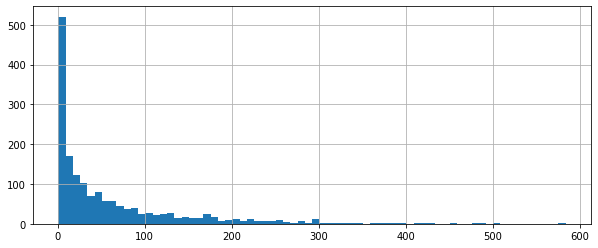

In [46]:
#We can see from the below figure that most of the movies have few number of ratings.
plt.figure(figsize=(10,4))
ratings['number_ratings'].hist(bins=70)

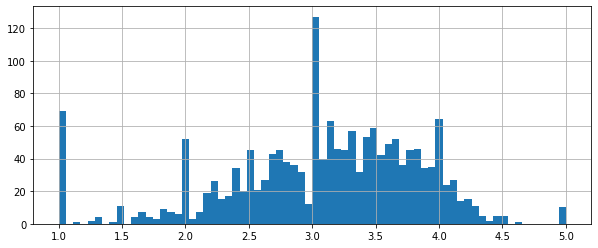

In [47]:
# This histogram shows the distribution of rating 
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

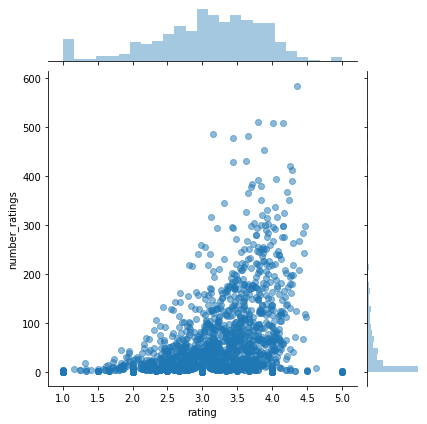

In [48]:
# More rating highest number of rating
sns.jointplot(x='rating',y='number_ratings',data=ratings,alpha=0.5)
plt.show()

## Recommender System

In [49]:
movie_matrix = df.pivot_table(index='user_id',columns='title',values='rating')

In [50]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
ratings.sort_values('number_ratings',ascending=False).head(5)

,rating,number_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [52]:
#Select user ratings for two movies 
starwars_user_ratings = movie_matrix['Star Wars (1977)']
liarliar_user_ratings = movie_matrix['Liar Liar (1997)']

In [53]:
# shows the rating of every users for this movie
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [54]:
liarliar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

In [55]:
# Find correlations between series with corrwith (instead of corr)
import warnings
warnings.filterwarnings("ignore")

similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)
similar_to_liarliar = movie_matrix.corrwith(liarliar_user_ratings)

In [56]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [57]:
# Removing NaN values and using a DataFrame instead of a series 
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)

In [58]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [59]:
corr_liarliar.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0
Mina Tannenbaum (1994),1.0
"Stranger, The (1994)",1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
Legal Deceit (1997),1.0


In [60]:
#Filtering out movies that have less than 100 reviews (based off the histogram from earlier)

In [61]:
corr_starwars = corr_starwars.join(ratings['number_ratings'])
corr_starwars.head()

,Correlation,number_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [62]:
corr_starwars[corr_starwars['number_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [63]:
corr_liarliar = corr_liarliar.join(ratings['number_ratings'])
corr_liarliar[corr_liarliar['number_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


# Fast AI

In [65]:
from fastai.collab import *
from fastai.tabular import *

In [70]:
#create a CollabDataBunch (a databunch which created for collaborative filtering problems)
data = CollabDataBunch.from_df(df, seed=42, valid_pct=0.1, item_name='title')

In [73]:
#show a batch of our data
data.show_batch()

user_id,title,target
707,Michael Collins (1996),3.0
737,Braveheart (1995),4.0
627,Circle of Friends (1995),2.0
130,"Blob, The (1958)",4.0
573,Emma (1996),4.0


In [80]:
df.rating.min(), df.rating.max()

(1, 5)

## EmbeddingDotBias Model

In [82]:
#FastAI provides two different types of collab models. EmbeddingDotBias and neural network based model

#Both models can be created using the collab_learner class

In [83]:
learn = collab_learner(data, n_factors=40, y_range=(1, 5), wd=1e-1)

In [84]:
# find the learning rate, train our model using the fit_one_cycle method and save the model

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


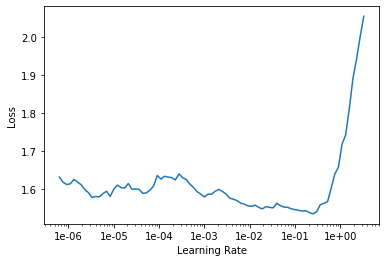

In [85]:
learn.lr_find() # find learning rate
learn.recorder.plot() # plot learning rate graph

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


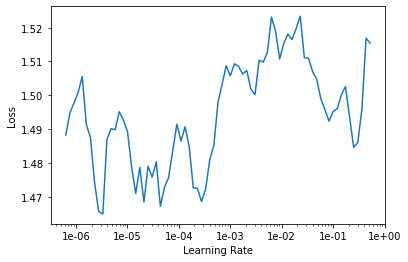

In [86]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [87]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.965310,0.952755,00:13
1,0.851835,0.866856,00:12
2,0.779772,0.828221,00:11
3,0.661867,0.809347,00:11
4,0.610883,0.809972,00:12


In [88]:
learn.save('movie-dot-1')

# Setup

In [89]:
learn.load('movie-dot-1');

In [91]:
g = df.groupby('title')['rating'].count()
g.sort_values(ascending=False)[:1000]

title
Star Wars (1977)                       584
Contact (1997)                         509
Fargo (1996)                           508
Return of the Jedi (1983)              507
Liar Liar (1997)                       485
                                      ... 
Selena (1997)                           16
In the Bleak Midwinter (1995)           16
Party Girl (1995)                       16
Highlander III: The Sorcerer (1994)     16
Bastard Out of Carolina (1996)          16
Name: rating, Length: 1000, dtype: int64

In [92]:
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

## Movie bias

In [100]:
movie_bias = learn.bias(top_movies, is_item=True) #set true for items and set false for users
movie_bias.shape

torch.Size([1000])

In [95]:
mean_ratings = df.groupby('title')['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i], g.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [96]:
item0 = lambda o:o[0]

In [98]:
lowest_bias = sorted(movie_ratings, key=item0)[:1000]
lowest_bias[:10]

[(tensor(-0.4345),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106,
  19),
 (tensor(-0.4138), 'Cable Guy, The (1996)', 2.339622641509434, 106),
 (tensor(-0.4092),
  'Mortal Kombat: Annihilation (1997)',
  1.9534883720930232,
  43),
 (tensor(-0.3415),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142,
  21),
 (tensor(-0.3295), 'Striptease (1996)', 2.2388059701492535, 67),
 (tensor(-0.3244), 'Grease 2 (1982)', 2.0, 24),
 (tensor(-0.3240), 'Crow: City of Angels, The (1996)', 1.9487179487179487, 39),
 (tensor(-0.3229), 'Leave It to Beaver (1997)', 1.8409090909090908, 44),
 (tensor(-0.3202), "McHale's Navy (1997)", 2.1884057971014492, 69),
 (tensor(-0.3146),
  'Beautician and the Beast, The (1997)',
  2.313953488372093,
  86)]

In [99]:
list(filter(lambda a: a[2] >=3 , lowest_bias))[:10]

[(tensor(-0.1402),
  'Cook the Thief His Wife & Her Lover, The (1989)',
  3.024390243902439,
  82),
 (tensor(-0.1359), 'Crossing Guard, The (1995)', 3.0, 28),
 (tensor(-0.1303), 'Lost Highway (1997)', 3.136, 125),
 (tensor(-0.1263), 'Bedknobs and Broomsticks (1971)', 3.0701754385964914, 57),
 (tensor(-0.1212), 'James and the Giant Peach (1996)', 3.126984126984127, 126),
 (tensor(-0.1207), 'Broken Arrow (1996)', 3.031496062992126, 254),
 (tensor(-0.1184), 'Parent Trap, The (1961)', 3.095890410958904, 73),
 (tensor(-0.1123), 'Speechless (1994)', 3.0833333333333335, 36),
 (tensor(-0.1101), 'Kalifornia (1993)', 3.2203389830508473, 59),
 (tensor(-0.1066), 'Blue in the Face (1995)', 3.1777777777777776, 45)]

## EmbeddingNN Model